In [6]:
import palantir
import scanpy as sc
import numpy as np
import os

# Plotting 
import matplotlib
import matplotlib.pyplot as plt

# Inline plotting
#%matplotlib inline

import pandas as pd

# Reset random seed
np.random.seed(5)

import harmony

In [ ]:
for i in range(1,40):
    # Load sample data
    dir = '/Users/4472241/scCode/runPalantir/'
    ad = sc.read(dir + 'countData/cmml'+str(i)+'Counts.csv')
    sc.pp.normalize_per_cell(ad)
    pseudo_count = 0.1
    ad.X.data = np.log2(ad.X + pseudo_count) - np.log2(pseudo_count)
    sc.pp.highly_variable_genes(ad, n_top_genes=2001, flavor='cell_ranger')
    # Note in the manuscript, we did not use highly variable genes and hence use_hvg is set to False. 
    # We recommend setting use_hvg to True for other datasets
    pca_projections, _ = palantir.utils.run_pca(ad, use_hvg=False)
    # Run diffusion maps
    dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
    ms_data = palantir.utils.determine_multiscale_space(dm_res)
    fdl = harmony.plot.force_directed_layout(dm_res['kernel'], ad.obs_names)
    fdl.to_csv(dir+'outputNew/cmml'+str(i)+'fdl.csv')
    tsne = palantir.utils.run_tsne(ms_data)
    fdl.to_csv(dir+'outputNew/cmml'+str(i)+'tsne.csv')
    #Run the imputation (copied from github because fn. wasn't working)
    if type(ad) is sc.AnnData:
        data = pd.DataFrame(ad.X, index=ad.obs_names, columns=ad.var_names)
    n_steps = 3
    T_steps = dm_res["T"] ** n_steps
    imputed_data = pd.DataFrame(
        np.dot(T_steps.todense(), data), index=data.index, columns=data.columns
    )
    imp_df = imputed_data
    
    ####### tSNE #######
    #Plot the genes used for gating receptors
    palantir.plot.plot_gene_expression(imp_df, tsne, ["PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"])
    #plt.show()
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'tsneGeneExp_Gating.pdf')
    plt.show()
    
    #Plot miscellaneous other genes (cell state mostly)
    palantir.plot.plot_gene_expression(imp_df, tsne, ["MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A", "IL1A", "IL1B", "IL1RN", 
                                                     "FOS", "ATF1", "JDP2", "SEMA4D"])
    plt.show()
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'tsneGeneExp_Misc.pdf')
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, tsne, ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG', 'IL5RA',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R'])
    plt.show()
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'tsneGeneExp_panelA.pdf')
    
    ###### FDL #######
    #Plot the genes used for gating receptors
    palantir.plot.plot_gene_expression(imp_df, fdl, ["PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"])
    plt.show()
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'fdlGeneExp_Gating.pdf')
    
    #Plot the miscellanours other genes
    palantir.plot.plot_gene_expression(imp_df, fdl, ["MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A", "IL1A", "IL1B", "IL1RN", 
                                                     "FOS", "ATF1", "JDP2", "SEMA4D"])
    plt.show()
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'fdlGeneExp_Misc.pdf')
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, fdl, ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG', 'IL5RA',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R'])
    plt.show()
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'fdlGeneExp_panelA.pdf')

<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inherently unsafe operation and will be removed in the future.
  ad.X.data = np.log2(ad.X + pseudo_count) - np.log2(pseudo_count)


Determing nearest neighbor graph...


100%|██████████| 500/500 [00:33<00:00, 15.07it/s]


BarnesHut Approximation  took  18.51  seconds
Repulsion forces  took  13.19  seconds
Gravitational forces  took  0.08  seconds
Attraction forces  took  0.53  seconds
AdjustSpeedAndApplyForces step  took  0.42  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:24<00:00, 20.44it/s]


BarnesHut Approximation  took  12.55  seconds
Repulsion forces  took  10.39  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.56  seconds
AdjustSpeedAndApplyForces step  took  0.43  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:22<00:00, 22.37it/s]


BarnesHut Approximation  took  12.53  seconds
Repulsion forces  took  8.53  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.45  seconds
AdjustSpeedAndApplyForces step  took  0.37  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:19<00:00, 25.46it/s]


BarnesHut Approximation  took  10.42  seconds
Repulsion forces  took  7.95  seconds
Gravitational forces  took  0.07  seconds
Attraction forces  took  0.45  seconds
AdjustSpeedAndApplyForces step  took  0.37  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:11<00:00, 44.56it/s]


BarnesHut Approximation  took  6.60  seconds
Repulsion forces  took  3.87  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.26  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:29<00:00, 16.80it/s]


BarnesHut Approximation  took  14.93  seconds
Repulsion forces  took  12.97  seconds
Gravitational forces  took  0.10  seconds
Attraction forces  took  0.70  seconds
AdjustSpeedAndApplyForces step  took  0.52  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:11<00:00, 44.77it/s]


BarnesHut Approximation  took  6.58  seconds
Repulsion forces  took  3.94  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  0.20  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:46: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:58: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:65: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:26<00:00, 19.19it/s]


BarnesHut Approximation  took  13.09  seconds
Repulsion forces  took  11.39  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.57  seconds
AdjustSpeedAndApplyForces step  took  0.45  seconds


<ipython-input-7-687b0708c9ac>:34: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-7-687b0708c9ac>:39: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [4]:
for i in range(1,8):
    # Load sample data
    dir = '/Users/4472241/scCode/runPalantir/'
    ad = sc.read(dir + 'countData/normal'+str(i)+'Counts.csv')
    sc.pp.normalize_per_cell(ad)
    pseudo_count = 0.1
    ad.X.data = np.log2(ad.X + pseudo_count) - np.log2(pseudo_count)
    sc.pp.highly_variable_genes(ad, n_top_genes=2001, flavor='cell_ranger')
    # Note in the manuscript, we did not use highly variable genes and hence use_hvg is set to False. 
    # We recommend setting use_hvg to True for other datasets
    pca_projections, _ = palantir.utils.run_pca(ad, use_hvg=False)
    # Run diffusion maps
    dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
    ms_data = palantir.utils.determine_multiscale_space(dm_res)
    fdl = harmony.plot.force_directed_layout(dm_res['kernel'], ad.obs_names)
    fdl.to_csv(dir+'output/normal'+str(i)+'fdl.csv')
    tsne = palantir.utils.run_tsne(ms_data)
    fdl.to_csv(dir+'output/normal'+str(i)+'tsne.csv')
    #Run the imputation (copied from github because fn. wasn't working)
    if type(ad) is sc.AnnData:
        data = pd.DataFrame(ad.X, index=ad.obs_names, columns=ad.var_names)
    n_steps = 3
    T_steps = dm_res["T"] ** n_steps
    imputed_data = pd.DataFrame(
        np.dot(T_steps.todense(), data), index=data.index, columns=data.columns
    )
    imp_df = imputed_data
    
    ####### tSNE #######
    #Plot the genes used for gating receptors
    palantir.plot.plot_gene_expression(imp_df, tsne, ["PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"])
    plt.show()
    plt.savefig(dir+'outputNew/'+'normal'+str(i)+'tsneGeneExp_Gating.pdf')
    
    #Plot miscellaneous other genes (cell state mostly)
    palantir.plot.plot_gene_expression(imp_df, tsne, ["MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A", "IL1A", "IL1B", "IL1RN", 
                                                     "FOS", "ATF1", "JDP2"])
    plt.show()
    plt.savefig(dir+'outputNew/'+'normal'+str(i)+'tsneGeneExp_Misc.pdf')
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, tsne, ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG', 'IL5RA',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R'])
    plt.show()
    plt.savefig(dir+'outputNew/'+'normal'+str(i)+'tsneGeneExp_panelA.pdf')
    
    ###### FDL #######
    #Plot the genes used for gating receptors
    palantir.plot.plot_gene_expression(imp_df, fdl, ["PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"])
    plt.show()
    plt.savefig(dir+'outputNew/'+'normal'+str(i)+'fdlGeneExp_Gating.pdf')
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, fdl, ["MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A", "IL1A", "IL1B", "IL1RN", 
                                                     "FOS", "ATF1", "JDP2"])
    plt.show()
    plt.savefig(dir+'outputNew/'+'normal'+str(i)+'fdlGeneExp_Misc.pdf')
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, fdl, ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG', 'IL5RA',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R'])
    plt.show()
    plt.savefig(dir+'outputNew/'+'normal'+str(i)+'fdlGeneExp_panelA.pdf')

<ipython-input-4-2f16e908e335>:7: DeprecationWarning: Assigning the 'data' attribute is an inherently unsafe operation and will be removed in the future.
  ad.X.data = np.log2(ad.X + pseudo_count) - np.log2(pseudo_count)


Determing nearest neighbor graph...


100%|██████████| 500/500 [01:51<00:00,  4.48it/s]


BarnesHut Approximation  took  54.20  seconds
Repulsion forces  took  51.82  seconds
Gravitational forces  took  0.26  seconds
Attraction forces  took  2.31  seconds
AdjustSpeedAndApplyForces step  took  1.36  seconds


<ipython-input-4-2f16e908e335>:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:45: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:34<00:00, 14.61it/s]


BarnesHut Approximation  took  17.01  seconds
Repulsion forces  took  15.24  seconds
Gravitational forces  took  0.11  seconds
Attraction forces  took  0.73  seconds
AdjustSpeedAndApplyForces step  took  0.54  seconds


<ipython-input-4-2f16e908e335>:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:45: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:24<00:00, 20.31it/s]


BarnesHut Approximation  took  13.02  seconds
Repulsion forces  took  10.17  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  0.51  seconds
AdjustSpeedAndApplyForces step  took  0.41  seconds


<ipython-input-4-2f16e908e335>:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:45: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [01:11<00:00,  6.97it/s]


BarnesHut Approximation  took  33.76  seconds
Repulsion forces  took  34.57  seconds
Gravitational forces  took  0.17  seconds
Attraction forces  took  1.40  seconds
AdjustSpeedAndApplyForces step  took  0.90  seconds


<ipython-input-4-2f16e908e335>:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:45: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [01:37<00:00,  5.15it/s]


BarnesHut Approximation  took  40.15  seconds
Repulsion forces  took  52.06  seconds
Gravitational forces  took  0.23  seconds
Attraction forces  took  2.02  seconds
AdjustSpeedAndApplyForces step  took  1.23  seconds


<ipython-input-4-2f16e908e335>:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:45: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [01:45<00:00,  4.76it/s]


BarnesHut Approximation  took  46.43  seconds
Repulsion forces  took  53.37  seconds
Gravitational forces  took  0.24  seconds
Attraction forces  took  2.20  seconds
AdjustSpeedAndApplyForces step  took  1.34  seconds


<ipython-input-4-2f16e908e335>:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:45: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:7: DeprecationWarning: Assigning the 'data' attribute is an inh

Determing nearest neighbor graph...


100%|██████████| 500/500 [00:34<00:00, 14.31it/s]


BarnesHut Approximation  took  16.68  seconds
Repulsion forces  took  16.31  seconds
Gravitational forces  took  0.10  seconds
Attraction forces  took  0.74  seconds
AdjustSpeedAndApplyForces step  took  0.54  seconds


<ipython-input-4-2f16e908e335>:32: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:38: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:45: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:51: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:57: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-4-2f16e908e335>:64: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [ ]:
for i in range(9,10):
    
    # Load sample data, normalize, and find HVG
    dir = '/Users/4472241/scCode/runPalantir/'
    ad = sc.read(dir + 'countData/cmml'+str(i)+'Counts.csv')
    sc.pp.normalize_per_cell(ad)
    pseudo_count = 0.1
    ad.X.data = np.log2(ad.X + pseudo_count) - np.log2(pseudo_count)
    sc.pp.highly_variable_genes(ad, n_top_genes=2001, flavor='cell_ranger')
    
    # Note in the manuscript, we did not use highly variable genes and hence use_hvg is set to False. 
    # We recommend setting use_hvg to True for other datasets
    pca_projections, _ = palantir.utils.run_pca(ad, use_hvg=False)
    
    # Run diffusion maps
    dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
    ms_data = palantir.utils.determine_multiscale_space(dm_res)
    
    #Make force-directed layouts and save
    fdl = harmony.plot.force_directed_layout(dm_res['kernel'], ad.obs_names)
    fdl.to_csv(dir+'output/cmml'+str(i)+'fdl.csv')
    
    #Make tSNE and save
    tsne = palantir.utils.run_tsne(ms_data)
    tsne.to_csv(dir+'output/cmml'+str(i)+'tsne.csv')
    
    #Run the imputation (copied from github because fn. wasn't working)
    if type(ad) is sc.AnnData:
        data = pd.DataFrame(ad.X, index=ad.obs_names, columns=ad.var_names)
    n_steps = 3
    T_steps = dm_res["T"] ** n_steps
    imputed_data = pd.DataFrame(
        np.dot(T_steps.todense(), data), index=data.index, columns=data.columns
    )
    imp_df = imputed_data
    
    ####### tSNE #######
    #Plot the genes used for gating receptors
    palantir.plot.plot_gene_expression(imp_df, tsne, ["PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"])
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'tsneGeneExp_Gating.pdf')
    plt.show()
    
    #Plot miscellaneous other genes (cell state mostly)
    palantir.plot.plot_gene_expression(imp_df, tsne, ["MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A"])
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'tsneGeneExp_Misc.pdf')
    plt.show()
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, tsne, ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG', 'IL5RA',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R'])
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'tsneGeneExp_panelA.pdf')
    plt.show()
    
    ###### FDL #######
    #Plot the genes used for gating receptors
    palantir.plot.plot_gene_expression(imp_df, fdl, ["PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"])
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'fdlGeneExp_Gating.pdf')
    plt.show()
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, fdl, ["MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A"])
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'fdlGeneExp_Misc.pdf')
    plt.show()
    
    #Plot the panel A genes
    palantir.plot.plot_gene_expression(imp_df, fdl, ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG', 'IL5RA',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R'])
    plt.savefig(dir+'outputNew/'+'cmml'+str(i)+'fdlGeneExp_panelA.pdf')
    plt.show()

In [44]:
#Normalize all gene expression so it is on a 0 to 1 scale (for genes of interest)
import itertools
genesKeep = ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG', 'IL5RA',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R',
             "MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A",
             "PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"]
imp_df_select = imp_df[['CCR2', 'CSF2RA', 'HAVCR2', 'TLR2', "TNFRSF1B", 'CSF1R', 'IFNGR1', 'TLR4', 'CSF3R',
            "MPL", 'IL5RA',
            'IL15RA', "IL3RA", "KIT", 'IL2RG','TNFRSF1A','FLT3', 'CXCR4', 'CXCR2',
            'CXCR1', 'IL18R1']]
            # "MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A",
            # "PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"]]

#Now get z-score scale
imp_df_norm_select = (imp_df_select-imp_df_select.mean())/imp_df_select.std()
imp_df_norm_select = imp_df_norm_select.fillna(0)
imp_df_norm_select.max()

#Keep only non cluster 3 cells
cluster3Cells = pd.read_csv('/Users/4472241/scCode/runPalantir/countData/cmml9_namesInClus2.csv')
df = cluster3Cells[['x']]
namesKeep = list(itertools.chain.from_iterable(df.values))
#imp_df_select = imp_df_select.loc[namesKeep]
imp_df_norm_select = imp_df_norm_select.loc[~imp_df_select.index.isin(namesKeep)]

#Now get z-score scale
#imp_df_norm_select = (imp_df_select-imp_df_select.mean())/imp_df_select.std()
#imp_df_norm_select = imp_df_norm_select.fillna(0)
#imp_df_norm_select.max()

#Find co-expression
transpose = imp_df_norm_select.transpose()
coExpression_nonClus3 = transpose.dot(imp_df_norm_select)/(imp_df_norm_select.shape[0]-1)

################ BREAK ######################### BREAK ##################################

#Normalize all gene expression so it is on a z-score scale (for genes of interest)
genesKeep = ["IL3RA", "KIT", "MPL", "HAVCR2", "CSF2RA", 'CCR2', 'IL2RG',
            'IL15RA', 'TLR2', 'FLT3', 'CSF1R', 'CXCR4', 'CSF3R', 'CXCR2',
            'CXCR1', 'IL18R1', 'IFNGR1', 'TLR4', 'TNFRSF1A', 'TNFRSF1B', 'IL6R',
             "MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A",
             "PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"]
imp_df_select = imp_df[['CCR2', 'CSF2RA', 'HAVCR2', 'TLR2', "TNFRSF1B", 'CSF1R', 'IFNGR1', 'TLR4', 'CSF3R',
            "MPL", 'IL5RA',
            'IL15RA', "IL3RA", "KIT", 'IL2RG','TNFRSF1A', 'FLT3', 'CXCR4', 'CXCR2',
            'CXCR1', 'IL18R1']]
            # "MPO", "JUN", "CD79A", "PLAUR", "GATA1", "IRF8", "EBF1", "CLEC12A",
            # "PTPRC", "CD34", "CD38", "IL3RA", "THY1", "ITGA6"]]

#Now get z-score scale
imp_df_norm_select = (imp_df_select-imp_df_select.mean())/imp_df_select.std()
#imp_df_norm_select = imp_df_norm_select.fillna(0)
imp_df_norm_select.max()

imp_df_norm_select = imp_df_norm_select.loc[namesKeep]
#imp_df_select = imp_df_select.loc[~imp_df_select.index.isin(namesKeep)]

#Now get z-score scale
#imp_df_norm_select = (imp_df_select-imp_df_select.mean())/imp_df_select.std()
#imp_df_norm_select = imp_df_norm_select.fillna(0)
#imp_df_norm_select.max()

#Find correlation
transpose = imp_df_norm_select.transpose()
coExpression_clus3 = transpose.dot(imp_df_norm_select)/(imp_df_norm_select.shape[0]-1)

bestChoices = coExpression_clus3 - coExpression_nonClus3
print(coExpression_nonClus3)
print(imp_df_norm_select)
print(bestChoices)

              CCR2    CSF2RA    HAVCR2      TLR2  TNFRSF1B     CSF1R  \
CCR2      2.394137  2.311446  2.198978  2.336759  2.166359  2.296823   
CSF2RA    2.311446  2.286424  2.200783  2.284876  2.146484  2.147043   
HAVCR2    2.198978  2.200783  2.150501  2.184630  2.101296  1.969096   
TLR2      2.336759  2.284876  2.184630  2.320955  2.151762  2.238517   
TNFRSF1B  2.166359  2.146484  2.101296  2.151762  2.126691  1.917574   
CSF1R     2.296823  2.147043  1.969096  2.238517  1.917574  2.488381   
IFNGR1    2.204514  2.194913  2.141181  2.197244  2.119084  1.986227   
TLR4      2.270192  2.250521  2.187650  2.254724  2.155024  2.050133   
CSF3R     2.224874  2.197361  2.094359  2.224756  1.943576  2.241272   
MPL      -1.379185 -1.317318 -1.185632 -1.419468 -1.297618 -1.553252   
IL5RA     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
IL15RA   -1.646666 -1.580210 -1.578278 -1.608025 -1.821874 -1.235334   
IL3RA     0.907174  1.017845  1.008122  0.915536  0.691908  0.91

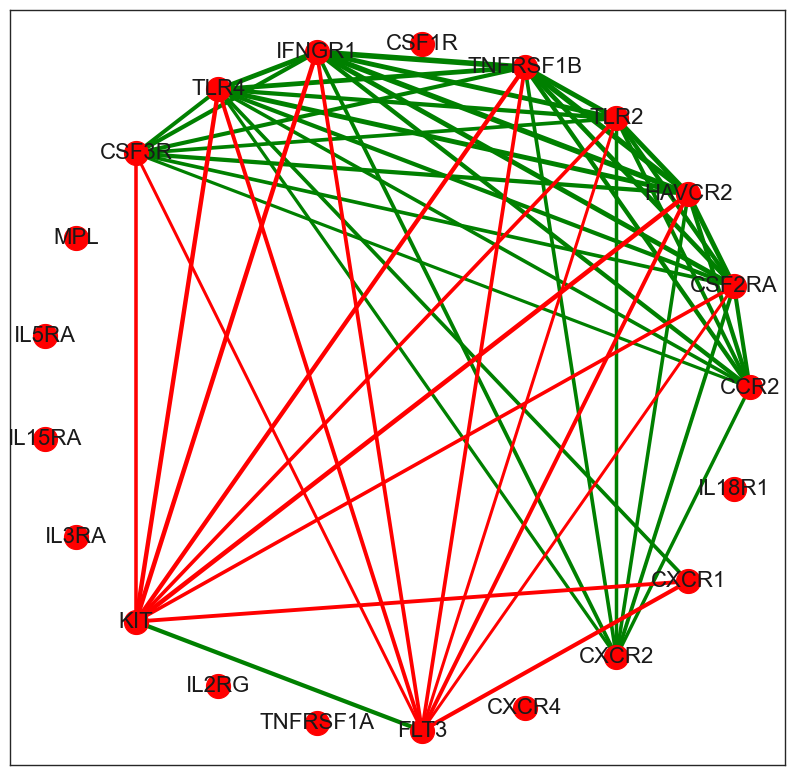

In [55]:
import string, random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100
nodes = list(imp_df_norm_select.columns)
len(nodes)

import itertools
networks = ['panelA']#, 'misc', 'gating']
networks_preList = ["panelA"]*21 #, ["misc"]*8, ["gating"]*6
networks_list = networks_preList #list(itertools.chain.from_iterable(networks_preList))

# Define what nodes belong to what network and what their color should be
node_network_map = dict(zip(nodes, networks_list))
colors = ['red']#, 'royalblue', 'red']
color_map = dict(zip(networks, colors))

graph = nx.Graph()
graph.add_nodes_from(nodes)
nodes_by_color = {val: [node for node in graph if color_map[node_network_map[node]] == val]
                  for val in colors}

# Take random sparse matrix as adjacency matrix
mat = coExpression_clus3.to_numpy()
for row, row_val in enumerate(nodes):
    for col, col_val in enumerate(nodes):
        if col > row and mat[row, col] != 0.0: # Stick to upper half triangle, mat is not symmetric
            graph.add_edge(row_val, col_val, weight=mat[row, col])

# Choose a layout to visualize graph
pos = nx.circular_layout(graph)
edges = graph.edges()

# Get the edge weights and normalize them 
weights = [graph[u][v]['weight'] for u, v in edges]
weights_n = [1*float(i)/max(weights) for i in weights]
count = 0
for i in weights:
    if (i > .4):
        weights_n[count] = 4*(float(i)/max(weights))**2
    else:
        weights_n[count] = 0
    count = count + 1
#weights_n = [1*float(i)/max(weights) for i in weights] # Change 5 to control thickness

# First draw the nodes 
plt.figure()
for color, node_names in nodes_by_color.items():
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=node_names, node_color=color)

# Then draw edges with thickness defined by weights_n
nx.draw_networkx_edges(graph, pos=pos, width=weights_n, edge_color = "green")
count = 0
for i in weights:
    if (i < -.4):
        weights_n[count] = -4*(float(i)/max(weights))**2
    else:
        weights_n[count] = 0
    count = count + 1
nx.draw_networkx_edges(graph, pos=pos, width=weights_n, edge_color = "red")
nx.draw_networkx_labels(graph, pos=pos, font_size=16)
plt.show()

#plt.savefig(dir+'outputNew/'+'cmml'+str(14)+'networkGraph_Clus3__spring_positiveOnly_squared.pdf')

In [46]:
weights_n

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [67]:
nodes

['IL3RA',
 'KIT',
 'MPL',
 'HAVCR2',
 'CSF2RA',
 'CCR2',
 'IL2RG',
 'IL5RA',
 'IL15RA',
 'TLR2',
 'FLT3',
 'CSF1R',
 'CXCR4',
 'CSF3R',
 'CXCR2',
 'CXCR1',
 'IL18R1',
 'IFNGR1',
 'TLR4',
 'TNFRSF1A',
 'TNFRSF1B',
 'IL6R',
 'MPO',
 'JUN',
 'CD79A',
 'PLAUR',
 'GATA1',
 'IRF8',
 'EBF1',
 'CLEC12A',
 'PTPRC',
 'CD34',
 'CD38',
 'IL3RA',
 'THY1',
 'ITGA6']

In [112]:
cluster3Cells = pd.read_csv('/Users/4472241/scCode/runPalantir/countData/cmml9_namesInClus2.csv')

In [119]:
df = cluster3Cells[['x']]
list(itertools.chain.from_iterable(df.values))

['SF100109106293_AAACCCAAGTACGAGC',
 'SF100109106293_AAACCCACAGCACAGA',
 'SF100109106293_AAACCCATCTACACAG',
 'SF100109106293_AAACGAATCTGAATCG',
 'SF100109106293_AAACGAATCTGTCCCA',
 'SF100109106293_AAACGCTGTTCCGCGA',
 'SF100109106293_AAACGCTTCGGAGCAA',
 'SF100109106293_AAAGAACAGACCTGGA',
 'SF100109106293_AAAGAACAGCCGGAAT',
 'SF100109106293_AAAGAACAGGGAGGCA',
 'SF100109106293_AAAGAACGTCCGGCAT',
 'SF100109106293_AAAGAACGTCGTTGGC',
 'SF100109106293_AAAGAACGTGTCGATT',
 'SF100109106293_AAAGAACTCTTCTGGC',
 'SF100109106293_AAAGGATCAAGCAATA',
 'SF100109106293_AAAGGATCACGCTGCA',
 'SF100109106293_AAAGGGCAGCAACTCT',
 'SF100109106293_AAAGGGCCAGAACATA',
 'SF100109106293_AAAGGGCTCGCTCTAC',
 'SF100109106293_AAAGGTACACACGCCA',
 'SF100109106293_AAAGGTACACACTTAG',
 'SF100109106293_AAAGGTAGTAAGGAGA',
 'SF100109106293_AAAGGTATCATACGAC',
 'SF100109106293_AAAGTCCGTCCACATA',
 'SF100109106293_AAATGGAAGCTAGAGC',
 'SF100109106293_AAATGGACACAATGCT',
 'SF100109106293_AAATGGACAGACCTAT',
 'SF100109106293_AAATGGAGTGC